# Heat equation - Cooling of intrusions
## Part 2: Finite difference - 1D
The analytical solution for the cooling of a dyke only works if we make the asumptions that the cooling is one dimensional and there is only one heat source.
Here we employ a numerical technique for a similar setup to demonstrate that numerical techniques allow investigating more complex situations.
We will calculate the temperature profile across two parallel dykes. The situation is still one-dimensional but the temperature evolution is more complex.
The heat equation and the employed finite difference scheme (Forward Euler) are detailed in the hand-out.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

from ipywidgets import FloatProgress
from IPython.display import display

### Physical parameters
Here we indicate the physical parameters of the simulation

In [10]:
X1 = -50       # position dyke 1
X2 = 50        # position dyke 2

T1 = 1200      # initial temperature dyke 1
T2 = 1200      # initial temperature dyke 2
T0 = 200       # temperature host rock

W1 = 20        # width dyke 1
W2 = 20        # width dyke 2

t1 = 0
t2 = 2*365*24*3600      # time intrusion dyke 2
tend = 4*365*24*3600  # time end of simulation

k = 1e-6      # thermal diffusivity of rocks

### Numerical parameters
Here we define how the physical parameters are going to be discretized.

In [11]:
L = 2000                               # length of profile
dx = 1                                 # resolution in profile
nx = L + 1                             # number of points in the profile
x = np.linspace(-L/2,L/2,nx)           # vector coordinates of points in the profile
dt = 0.4*(dx*dx/(2*k))                 # time step
Tc = np.zeros((int(tend/dt),1))        # vector temperature in central point
tc = np.linspace(0,tend,int(tend/dt))  # vector time

### Initial conditions
Defines the initial temperature profile

In [12]:
T = T0 * np.ones(nx)                   # defines host temperature everywhere
dX1 = x - X1                           # distance from center of dyke 1
for index,item in enumerate(dX1):
    if abs(item) < W1/2:
        T[index] = T1                  # if within dyke 1 then temperature is T1

### First time loop
We calculate the evolution of the temperature along the profile from t1 to t2, using the Forward Euler Scheme

In [13]:
nt1 = int((t2-t1)/dt)                  # number of time steps to produce to get to t2
ctime = 0

f = FloatProgress(min=0,max=100)       # create a progress bar to see how the simulation goes
display(f)

for n in range(0,nt1):                 # main loop for time
    T_new = np.zeros(nx)               # new temperature profile
    f.value = int(n/nt1*100)
    
    for i in range(1,nx-1):            # main loop for space (along the profile)
        T_new[i] = T[i] + (k*dt/(dx*dx))*(T[i-1]-2*T[i]+T[i+1])
    
    T_new[0] = T[0]                    # apply the boundary condition (T remains constant at edges of profile)       
    T_new[nx-1] = T[nx-1]
    T = T_new
    Tc[n] = T[int(nx/2)]               # get temperature at center point
    ctime = ctime+dt                   # update time

### Change initial condition at time t2
We take the output of the first part of the simulation and modify it to ccount for the second intrusion

In [14]:
dX2 = x-X2
for index, item in enumerate(dX2):
    if abs(item) < W2/2:
        T[index] = T2

nt2 = int((tend-t2)/dt)                # number of time steps to get from t2 to tend
f = FloatProgress(min=0,max=100)       # create a progress bar to see how the simulation goes
display(f)

for n in range(0,nt2):                 # main loop for time
    T_new = np.zeros(nx)               # new temperature profile
    f.value = int(n/nt1*100)
    
    for i in range(1,nx-1):            # main loop for space (along the profile)
        T_new[i] = T[i] + (k*dt/(dx*dx))*(T[i-1]-2*T[i]+T[i+1])
    
    T_new[0] = T[0]                    # apply the boundary condition (T remains constant at edges of profile)       
    T_new[nx-1] = T[nx-1]
    T = T_new
    Tc[nt1+n-1] = T[int(nx/2)]               # get temperature at center point
    ctime = ctime+dt   

Now we plot the temperature profile at tend

<IPython.core.display.Javascript object>


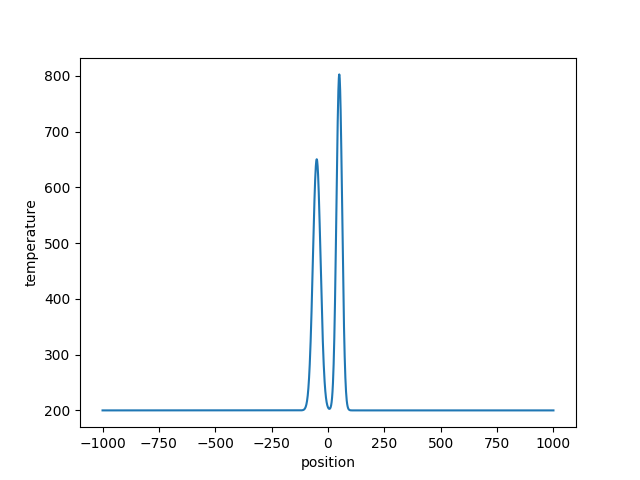

In [15]:
plt.figure(1)
plt.plot(x,T)
plt.xlabel("position")
plt.ylabel("temperature")
plt.show()

<IPython.core.display.Javascript object>


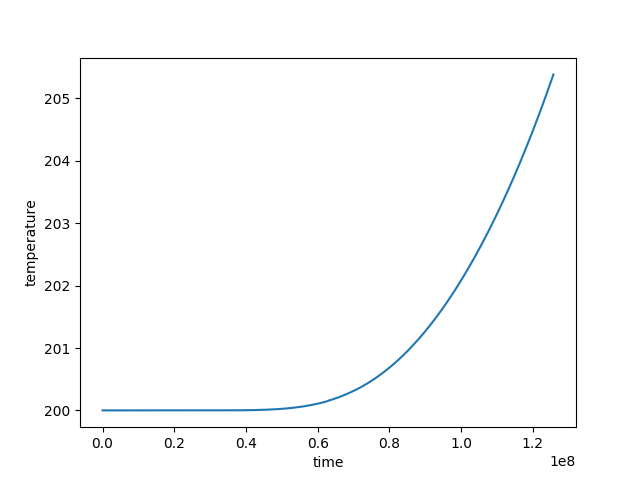

In [16]:
Tc[0] = T0
plt.figure(2)
plt.plot(tc[:-2],Tc[:-2])
plt.xlabel("time")
plt.ylabel("temperature")
plt.show()

## Tasks
1 - Run the silmulation to claculate the temperature profile at yers 3, 5, 10 and 20. Save the plots and place them in the report. Describe and comment on the temperature profiles.

2 - Run the simulation to year 100. Save the temperature profile and the temperature evolution at the centrl point. Place the figures in the report and describe and comment the figures. When is the peak temperature obtained in the central point?

3 - Run the simulation to year 100 with hotter host rock. How does that change the temperature evolution of the central point or the temperature profile? 

4 - Run the simultion to year 100 with one dyke hotter than the other. Compare with the previous results.